# Table des matières

- ## Les requêtes de Marc
    - ### [Requête N°1](#section_1_1) - la proportion de personnes en état de sous-nutrition
    - ### [Requête N°2](#section_1_2) - le nombre théorique de personnes qui pourraient être nourries en 2017
    - ### [Requête N°3](#section_1_3) - le nombre théorique de personnes qui pourraient être nourries à partir de la disponibilité des produits végétaux en 2017
    * ### [Requête N°4](#section_1_4) - utilisation de la disponibilité intérieure. La part attribuée à l’alimentation animale, celle qui est perdue et celle qui est utilisée pour l'alimentation humaine
<br>
- ## Les requêtes de Mélanie
    - ### [Requête N°1](#section_2_1) - les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017
    - ### [Requête N°2](#section_2_2) - les pays qui ont le plus bénéficié d’aide depuis 2013
    - ### [Requête N°3](#section_2_3) - les pays ayant le plus/le moins de disponibilité/habitant
<br>
- ## Les pistes supplémentaires de recherche
    - ### [Requête N°1](#section_3_1) - les pistes supplémentaires de Julien concernant les céréales
    - ### [Requête N°2](#section_3_2) - la Thaïlande et l'utilisation du manioc

In [2]:
# Import des différentes librairies pour l'étude de santé
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Version des librairies utilisées pour ce notebook
print('\n'.join(f'{m.__name__} - {m.__version__}' 
                for m in globals().values() 
                if getattr(m, '__version__', None)))

pandas - 1.4.2
numpy - 1.21.5
seaborn - 0.11.2


In [4]:
# Import des différents jeux de données
df_sous_nutrition = pd.read_csv('sous_nutrition.csv')
df_population = pd.read_csv('population.csv')
df_aide_alimentaire = pd.read_csv('aide_alimentaire.csv')
df_dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')

## Requête N°1 - <a class="anchor" id="section_1_1">la proportion de personnes en état de sous-nutrition</a>

In [4]:
# Affichage de l'en-tête des valeurs de sous_nutrition
display(df_sous_nutrition.head())

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [5]:
# Recherche de possibles valeurs erronées pour un nettoyage
display(df_sous_nutrition['Valeur'].unique())

array(['8.6', '8.8', '8.9', '9.7', '10.5', '11.1', '2.2', '2.5', '2.8',
       '3', '3.1', '3.3', '0.1', '1.3', '1.2', nan, '7.6', '6.2', '5.3',
       '5.6', '5.8', '5.7', '1.5', '1.6', '1.1', '1.7', '<0.1', '21.7',
       '22.4', '23.3', '22.3', '21.5', '20.9', '0.8', '2', '1.9', '1.8',
       '0.4', '0.5', '0.3', '0.2', '3.2', '3.4', '3.6', '3.8', '2.1',
       '2.3', '2.4', '0.6', '0.7', '0.9', '3.9', '2.7', '1.4', '4.8',
       '4.6', '4.9', '5', '4.4', '4.3', '4.2', '4.5', '26.2', '24.3',
       '21.3', '21.1', '2.9', '5.1', '5.2', '5.4', '203.8', '198.3',
       '193.1', '190.9', '190.1', '189.2', '23.6', '24', '24.1', '3.7',
       '7.3', '7.8', '8.4', '9', '9.1', '10.1', '10', '10.7', '11.5',
       '11.9', '11.8', '8.7', '10.3', '11', '1', '5.5', '6.8', '7.9',
       '5.9', '7', '9.2', '9.4', '9.6', '6.7', '7.1', '7.2', '14.7',
       '17.4', '20.2', '22.2', '22.8', '24.6', '31.1', '28.5', '25.4',
       '24.8', '26.1', '14.5', '15.4', '16.5', '15.8', '15.7', '10.8',
       '

In [6]:
# Remplacement des valeurs "<0.1" par "0"
df_sous_nutrition.loc[df_sous_nutrition['Valeur'] == '<0.1'] = 0

In [7]:
# Remplacement des valeurs "nan" par 0
df_sous_nutrition.fillna(0, inplace=True)

In [8]:
# Vérification des colonnes avant de faire une jointure
display(df_sous_nutrition.columns)
display(df_population.columns)

Index(['Zone', 'Année', 'Valeur'], dtype='object')

Index(['Zone', 'Année', 'Valeur'], dtype='object')

In [9]:
# Création d'une variable "marc_1_sous_nutrition" pour scinder les résultats des différentes requêtes
# Jointure avec la colonne Zone et restriction sur l'année pour garder que l'année 2017
marc1_sous_nutrition = pd.merge(df_sous_nutrition.loc[df_sous_nutrition['Année'] == '2016-2018', ['Valeur', 'Zone']],
                               df_population.loc[df_population['Année'] == 2017, ['Valeur', 'Zone']],
                               on='Zone')

In [10]:
# Vérification de la jointure entre "sous_nutrition et population"
display(marc1_sous_nutrition.head())

,Valeur_x,Zone,Valeur_y
0,10.5,Afghanistan,36296.113
1,3.1,Afrique du Sud,57009.756
2,0.1,Albanie,2884.169
3,1.3,Algérie,41389.189
4,0,Allemagne,82658.409


In [11]:
# Renommage des colonnes pour plus de lisibilité
marc1_sous_nutrition.rename(columns=
                           {'Valeur_x' : 'Population sous-nutrition (millions)',
                           'Valeur_y' : 'Population (millions)'},
                           inplace=True)

In [12]:
# Vérification du renommage
display(marc1_sous_nutrition.head())

,Population sous-nutrition (millions),Zone,Population (millions)
0,10.5,Afghanistan,36296.113
1,3.1,Afrique du Sud,57009.756
2,0.1,Albanie,2884.169
3,1.3,Algérie,41389.189
4,0,Allemagne,82658.409


In [13]:
# Calcul de la population mondiale tout en mettant à l'échelle
population_mondiale = (marc1_sous_nutrition['Population (millions)'].sum())*1000

# Affichage de la population mondiale avec plus de lisibilité
print("La population mondiale est de {:,.0f} habitants.".format(population_mondiale))

La population mondiale est de 7,528,921,162 habitants.


In [14]:
# Modification du Dtype de "Personne sous-nutrition" pour le passer en float64
marc1_sous_nutrition['Population sous-nutrition (millions)'] = marc1_sous_nutrition['Population sous-nutrition (millions)'].astype('float64')

In [15]:
# Calcul du nombre total de personnes en sous-nutrition dans le monde
population_sous_nutrition = marc1_sous_nutrition['Population sous-nutrition (millions)'].sum()*1000000

# Affichage de la population en sous-nutrition dans le monde
print("Il y a {:,.0f} habitants en sous-nutrition dans le monde.".format(population_sous_nutrition))

Il y a 535,700,000 habitants en sous-nutrition dans le monde.


In [16]:
# Calcul de la proportion de la popoulation en sous-nutrition dans le monde
proportion_sous_nutrition = (population_sous_nutrition / population_mondiale) * 100

print("Il y a {:,.2f} % de la population mondiale en sous-nutrition dans le monde.".format(proportion_sous_nutrition))

Il y a 7.12 % de la population mondiale en sous-nutrition dans le monde.


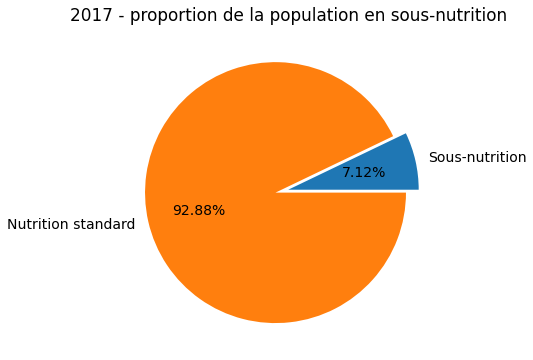

In [17]:
# Maintenant que les données sont récoltées, on va créer le graphique

# Création des portions en pourcentage (7,12 et 92,88)
# 7,12 correspond au nombre de personnes en sous nutrition
# 92,88 correspond au nombre de personnes en nutrition standard (car 100-7,12 = 92,88)

portion = [7.12, 92.88]
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 14})
plt.pie(portion, labels=['Sous-nutrition', 'Nutrition standard'], autopct='%.2f%%', explode=(0, 0.1))
plt.title('2017 - proportion de la population en sous-nutrition')
plt.show()

## Requête N°2 - <a class="anchor" id="section_1_2">le nombre théorique de personnes qui pourraient être nourries en 2017</a>

In [18]:
# Vérification de l'importation des données
display(df_dispo_alimentaire.head())

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [19]:
# Sélection des colonnes pour la requête demandée
marc2_dispo_alimentaire = df_dispo_alimentaire[[
    'Zone', 'Disponibilité alimentaire (Kcal/personne/jour)',
    'Disponibilité alimentaire en quantité (kg/personne/an)',
    'Disponibilité de matière grasse en quantité (g/personne/jour)',
    'Disponibilité de protéines en quantité (g/personne/jour)',
    'Disponibilité intérieure',
    'Exportations - Quantité',
    'Importations - Quantité'
]]

In [20]:
# Groupement des données sur la colonne "Zone"
marc2_dispo_alimentaire = marc2_dispo_alimentaire.groupby('Zone').sum()
[['Disponibilité alimentaire (Kcal/personne/jour)',
'Disponibilité alimentaire en quantité (kg/personne/an)']]
display(marc2_dispo_alimentaire.head())

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité
Zone,,,,,,,
Afghanistan,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0
Afrique du Sud,3020.0,564.80,83.58,85.33,61256.0,11674.0,7517.0
Albanie,3188.0,1095.54,106.48,111.37,4758.0,94.0,933.0
Algérie,3293.0,809.13,76.48,91.92,42630.0,655.0,17403.0
Allemagne,3503.0,957.52,141.62,101.39,162275.0,57431.0,65353.0


In [21]:
# Restriction sur l'année 2017
marc2_population = df_population.loc[df_population['Année'] == 2017, :]

In [22]:
# Jointure avec comme clé, la colonne "Zone" en "left" pour conserver les données de la population
marc2_population = pd.merge(marc2_population, marc2_dispo_alimentaire, on="Zone", how="left")

In [23]:
# Vérification de la jointure
display(marc2_population.head())

,Zone,Année,Valeur,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité
0,Afghanistan,2017,36296.113,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0
1,Afrique du Sud,2017,57009.756,3020.0,564.80,83.58,85.33,61256.0,11674.0,7517.0
2,Albanie,2017,2884.169,3188.0,1095.54,106.48,111.37,4758.0,94.0,933.0
3,Algérie,2017,41389.189,3293.0,809.13,76.48,91.92,42630.0,655.0,17403.0
4,Allemagne,2017,82658.409,3503.0,957.52,141.62,101.39,162275.0,57431.0,65353.0


In [24]:
# Calcul de la disponibilité alimentaire (kcal) avec une mise à l'échelle
marc2_dispo_total_kal = ((marc2_population["Valeur"]*1000) * 
                         (marc2_population['Disponibilité alimentaire (Kcal/personne/jour)'])).sum()

print("La quantité de disponibilité alimentaire est de {:,.0f} kcal.".format(marc2_dispo_total_kal))

La quantité de disponibilité alimentaire est de 20,918,984,627,331 kcal.


In [25]:
# Calcul de sii on part d'une base de 2500 Kcal par personne, par jour
marc2_total_nourri = marc2_dispo_total_kal / 2500

print("Le nombre théorique de personnes qui pourraient être nourries en 2017 est de {:,.0f} personnes."
      .format(marc2_total_nourri))

Le nombre théorique de personnes qui pourraient être nourries en 2017 est de 8,367,593,851 personnes.


In [26]:
# Calcul de la population mondiale
marc2_population_totale = (marc2_population['Valeur']*1000).sum()

print("La population mondiale en 2017 est de {:,.0f} personnes".format(marc2_population_totale))

La population mondiale en 2017 est de 7,548,134,111 personnes


In [27]:
# Calcul de la proportion de personnes pouvant être nourries
marc2_proportion = ((marc2_total_nourri / marc2_population_totale) * 100).sum()

print
("Le nombre de personnes pouvant être nourries grâce à la disponibilité alimentaire (kcal) totale est de : {:,.2f} %"
 .format(marc2_proportion))

'Le nombre de personnes pouvant être nourries grâce à la disponibilité alimentaire (kcal) totale est de : 110.86 %'

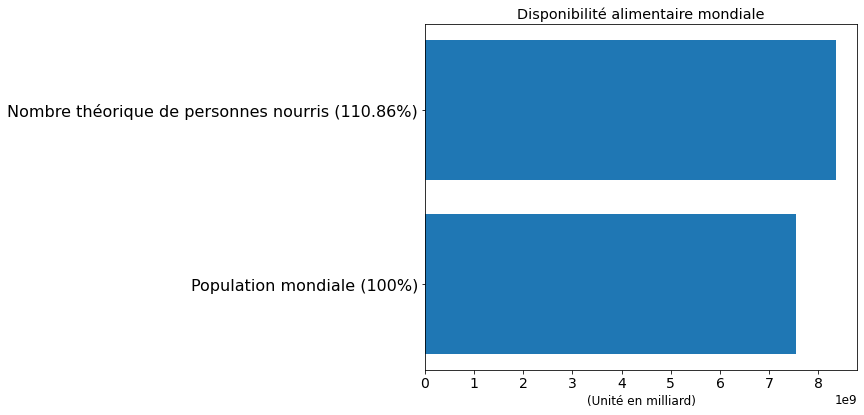

In [28]:
# Création du graphique pour présenter les résultats
fig = plt.figure()
plt.rcParams.update({'font.size': 12})

# Ajout des axes
axes = fig.add_axes([0, 0.8, 1, 1.2])

# Création des listes de données
population_x = ['Population mondiale (100%)','Nombre théorique de personnes nourris (110.86%)']
chiffres_y = [7548134111, 8367593851]

# Création du titre
plt.title('Disponibilité alimentaire mondiale')

# Ajout d'un label sur l'axe x
plt.xlabel("(Unité en milliard)")
plt.barh(population_x,chiffres_y)
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.show()

## Requête N°3 - <a class="anchor" id="section_1_3">le nombre théorique de personnes qui pourraient être nourries à partir de la disponibilité des produits végétaux en 2017</a>

In [29]:
marc3_dispo_alimentaire = df_dispo_alimentaire
marc3_population = df_population

In [30]:
display(marc3_dispo_alimentaire.head())

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [31]:
# Sélection des colonnes qui nous intéressent pour la suite
marc3_dispo_alimentaire = marc3_dispo_alimentaire[[
    "Zone", "Produit", "Origine",
    "Disponibilité alimentaire (Kcal/personne/jour)",
    "Disponibilité alimentaire en quantité (kg/personne/an)",
    "Disponibilité de protéines en quantité (g/personne/jour)"
]]

In [32]:
# Réstriction pour ne garder que les données d'aliments d'origine végétale
marc3_dispo_alimentaire = marc3_dispo_alimentaire.loc[marc3_dispo_alimentaire['Origine'] == 'vegetale',:]

In [33]:
# Regroupage et addition des données par "Zone"
marc3_dispo_alimentaire = marc3_dispo_alimentaire.groupby('Zone').sum()

In [34]:
# Affichage des deux opérations précédentes
display(marc3_dispo_alimentaire.head())

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour)
Zone,,,
Afghanistan,1871.0,271.49,46.05
Afrique du Sud,2533.0,425.17,48.94
Albanie,2203.0,706.49,51.96
Algérie,2915.0,632.35,66.94
Allemagne,2461.0,568.82,39.90


In [35]:
# Réstriction pour ne garder que l'année 2017
marc3_population = marc3_population.loc[marc3_population['Année'] == 2017, :]

In [36]:
# Vérification de la réstriction
display(marc3_population.head())

,Zone,Année,Valeur
4,Afghanistan,2017,36296.113
10,Afrique du Sud,2017,57009.756
16,Albanie,2017,2884.169
22,Algérie,2017,41389.189
28,Allemagne,2017,82658.409


In [37]:
# Jointure des deux df en prenant en index la colonne "Zone"
marc3_dispo_alimentaire = pd.merge(marc3_dispo_alimentaire, marc3_population, on="Zone")

In [38]:
# Calcul de la disponiblité alimentaire en mettant à l'echelle la colonne "Valeur"
marc3_total_dispo_vegetale_kcal = (((marc3_dispo_alimentaire['Valeur'] * 1000) * 
                                    marc3_dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)']).sum()) / 2500

print("La population pouvant être nourrie avec la disponibilité alimentaire végétale totale est de {:,.2f} habitants."
      .format(marc3_total_dispo_vegetale_kcal))

La population pouvant être nourrie avec la disponibilité alimentaire végétale totale est de 6,904,305,684.60 habitants.


In [39]:
# Calcul de la population mondiale
marc3_population_totale = (marc3_population['Valeur'] * 1000).sum()

print("La population mondiale en 2017 est de {:,.0f} habitants.".format(marc3_population_totale))

La population mondiale en 2017 est de 7,548,134,111 habitants.


In [40]:
# Calcul de la proportion de la disponibilité alimentaire végétale par rapport à la population mondiale
marc3_proportion = ((marc3_total_dispo_vegetale_kcal / marc3_population_totale) * 100).sum()

print("La proportion totale d'habitants pouvant être nourrie avec la disponibilité alimentaire végétale est de {:,.2f} %"
      .format(marc3_proportion))

La proportion totale d'habitants pouvant être nourrie avec la disponibilité alimentaire végétale est de 91.47 %


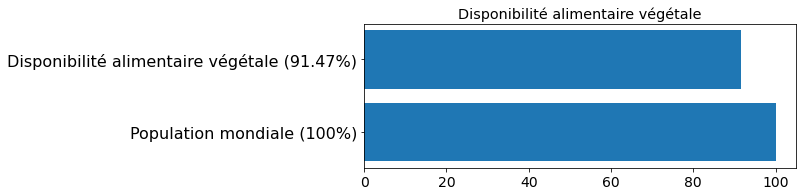

In [41]:
# Création du graphique pour afficher les résultats

# Création du graphique pour présenter les résultats
fig = plt.figure()
plt.rcParams.update({'font.size': 12})

# Ajout des axes
axes = fig.add_axes([0,1,1,0.5])

# Création des listes de données
population_x = ['Population mondiale (100%)','Disponibilité alimentaire végétale (91.47%)']
chiffres_y = [100,91.47]

# Création du titre
plt.title('Disponibilité alimentaire végétale')

# Ajout d'un label sur l'axe x
plt.barh(population_x,chiffres_y)
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.show()

## Requête N°4 - <a class="anchor" id="section_1_4">utilisation de la disponibilité intérieure. La part attribuée à l’alimentation animale, celle qui est perdue et celle qui est utilisée pour l'alimentation humaine</a>

In [42]:
marc4_dispo_alimentaire = df_dispo_alimentaire
marc4_population = df_population

In [43]:
df_dispo_alimentaire.columns

Index(['Zone', 'Produit', 'Origine', 'Aliments pour animaux',
       'Autres Utilisations', 'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Semences', 'Traitement', 'Variation de stock'],
      dtype='object')

In [44]:
# Sélection des colonnes qui nous intéressent pour la suite
marc4_dispo_alimentaire = marc4_dispo_alimentaire[['Zone','Aliments pour animaux','Autres Utilisations',
                                                   'Disponibilité intérieure','Exportations - Quantité',
                                                   'Importations - Quantité','Nourriture','Pertes','Production',
                                                   'Semences','Traitement','Variation de stock']]

In [45]:
display(marc4_dispo_alimentaire.head())

,Zone,Aliments pour animaux,Autres Utilisations,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,NaN,NaN,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,NaN,NaN,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,NaN,NaN,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [46]:
# Regroupage et addition des données par "Zone"
marc4_dispo_alimentaire = marc4_dispo_alimentaire.groupby('Zone').sum()

In [47]:
# Remplacement des valeurs "nan" par 0 pour éviter les erreurs de calculs
marc4_dispo_alimentaire.fillna(0, inplace=True)

In [48]:
# Jointure à l'aide des données de population avec la colonne "Zone"
marc4_dispo_alimentaire = pd.merge(marc4_dispo_alimentaire, marc4_population, on='Zone', how='left')

In [49]:
# Calcul de la proportion de disponibilité alimentaire pour les animaux
marc4_proportion_aliments_animaux = (marc4_dispo_alimentaire['Aliments pour animaux'].sum() / 
                                    marc4_dispo_alimentaire['Disponibilité intérieure'].sum() * 100)

print("La proportion pour l'alimentation animale est de {:,.2f} %".format(marc4_proportion_aliments_animaux))

La proportion pour l'alimentation animale est de 13.23 %


In [50]:
# Calcul de la proportion de disponibilité alimentaire perdue
marc4_proportion_pertes = (marc4_dispo_alimentaire['Pertes'].sum() / 
                           marc4_dispo_alimentaire['Disponibilité intérieure'].sum() * 100)

print("La proportion des pertes est de {:,.2f} %".format(marc4_proportion_pertes))

La proportion des pertes est de 4.64 %


In [51]:
# Calcul de la proportion de disponibilité alimentaire pour les humains
marc4_proportion_aliments_humains = (marc4_dispo_alimentaire['Nourriture'].sum() / 
                                    marc4_dispo_alimentaire['Disponibilité intérieure'].sum() * 100)

print("La proportion pour l'alimentation humaine est de {:,.2f} %".format(marc4_proportion_aliments_humains))

La proportion pour l'alimentation humaine est de 49.39 %


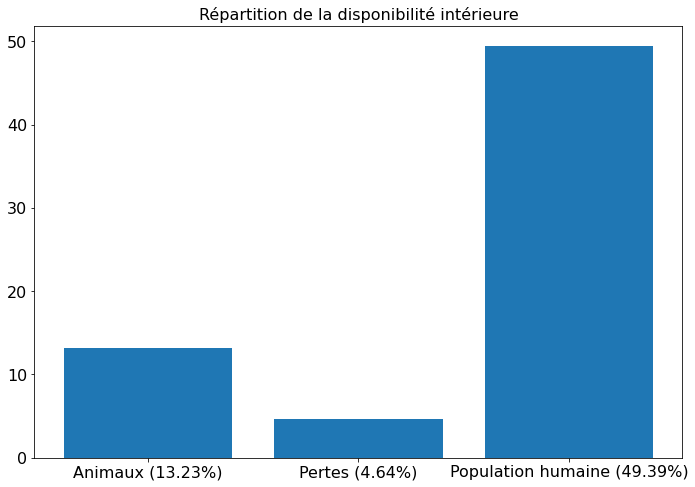

In [52]:
# Récupération des différentes données et création du graphique

fig = plt.figure()
axes = fig.add_axes([0.8, 0.7, 1.5, 1.5])
population_x = ['Animaux (13.23%)', 'Pertes (4.64%)', 'Population humaine (49.39%)']
chiffres_y = [13.23, 4.64, 49.39]
plt.bar(population_x, chiffres_y)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Répartition de la disponibilité intérieure", fontsize=16)
plt.show()

## Requête N°1 - <a class="anchor" id="section_2_1">les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017</a>

In [53]:
melanie1_sous_nutrition = df_sous_nutrition
melanie1_population = df_population

In [54]:
# Remplacement des valeurs "<0.1" par 0 pour éviter les erreurs de calculs
melanie1_sous_nutrition.loc[melanie1_sous_nutrition['Valeur'] == '<0.1' ] = 0

# Remplacement des valeurs nan par 0 pour éviter également les erreurs de calculs
melanie1_sous_nutrition.fillna(0, inplace=True)

In [55]:
# Changement du type de la colonne "Valeur" pour la passer en float64 pour les calculs
melanie1_sous_nutrition['Valeur'] = melanie1_sous_nutrition['Valeur'].apply(pd.to_numeric)

In [56]:
# Jointure avec la colonne "Zone" et restriction sur l'année pour garder que l'année 2017
melanie1_sous_nutrition = pd.merge(
    melanie1_sous_nutrition.loc[melanie1_sous_nutrition['Année'] == '2016-2018', ['Valeur', 'Zone']],
                                  melanie1_population.loc[melanie1_population['Année'] == 2017, ['Année', 'Valeur', 'Zone']],
                                  on='Zone')

In [57]:
# Vérification de la jointure
display(melanie1_sous_nutrition.head())

,Valeur_x,Zone,Année,Valeur_y
0,10.5,Afghanistan,2017,36296.113
1,3.1,Afrique du Sud,2017,57009.756
2,0.1,Albanie,2017,2884.169
3,1.3,Algérie,2017,41389.189
4,0.0,Allemagne,2017,82658.409


In [58]:
# Renommage des colonnes pour plus de lisibilité
melanie1_sous_nutrition.rename(columns=
                           {'Valeur_x' : 'Population sous-nutrition (millions)',
                           'Valeur_y' : 'Population (millions)'},
                           inplace=True)

In [59]:
# Mise à l'échelle de la colonne "Population sous-nutrition (millions)"
melanie1_sous_nutrition['Population sous-nutrition (millions)'] = (
    melanie1_sous_nutrition['Population sous-nutrition (millions)']) * 1000000

In [60]:
# Mise à l'échelle de la colonne "Population (millions)"
melanie1_sous_nutrition['Population (millions)'] = (melanie1_sous_nutrition['Population (millions)']) * 1000

In [61]:
# Création d'une colonne "Proportion" pour pouvoir finaliser la demande initiale
melanie1_sous_nutrition['Proportion'] = (
    melanie1_sous_nutrition['Population sous-nutrition (millions)'] / 
    melanie1_sous_nutrition['Population (millions)'] * 100
)

In [62]:
# Tri de la colonne proportion par ordre décroissant
melanie1_sous_nutrition = melanie1_sous_nutrition.sort_values(by='Proportion', ascending=False)

In [63]:
display(melanie1_sous_nutrition.head(10))

,Population sous-nutrition (millions),Zone,Année,Population (millions),Proportion
69,5300000.0,Haïti,2017,10982366.0,48.259182
142,12000000.0,République populaire démocratique de Corée,2017,25429825.0,47.188685
96,10500000.0,Madagascar,2017,25570512.0,41.062924
92,1800000.0,Libéria,2017,4702226.0,38.279742
89,800000.0,Lesotho,2017,2091534.0,38.249438
165,5700000.0,Tchad,2017,15016753.0,37.957606
146,4200000.0,Rwanda,2017,11980961.0,35.055619
108,9400000.0,Mozambique,2017,28649018.0,32.810898
168,400000.0,Timor-Leste,2017,1243258.0,32.173531
0,10500000.0,Afghanistan,2017,36296113.0,28.928718


In [64]:
# Création d'un dataframe pour stocker définitivement que les 10 premiers résultats les plus hauts
df_melanie1_sous_nutrition_sorted = melanie1_sous_nutrition.head(10)

In [65]:
df_melanie1_sous_nutrition_sorted.head(10)

,Population sous-nutrition (millions),Zone,Année,Population (millions),Proportion
69,5300000.0,Haïti,2017,10982366.0,48.259182
142,12000000.0,République populaire démocratique de Corée,2017,25429825.0,47.188685
96,10500000.0,Madagascar,2017,25570512.0,41.062924
92,1800000.0,Libéria,2017,4702226.0,38.279742
89,800000.0,Lesotho,2017,2091534.0,38.249438
165,5700000.0,Tchad,2017,15016753.0,37.957606
146,4200000.0,Rwanda,2017,11980961.0,35.055619
108,9400000.0,Mozambique,2017,28649018.0,32.810898
168,400000.0,Timor-Leste,2017,1243258.0,32.173531
0,10500000.0,Afghanistan,2017,36296113.0,28.928718


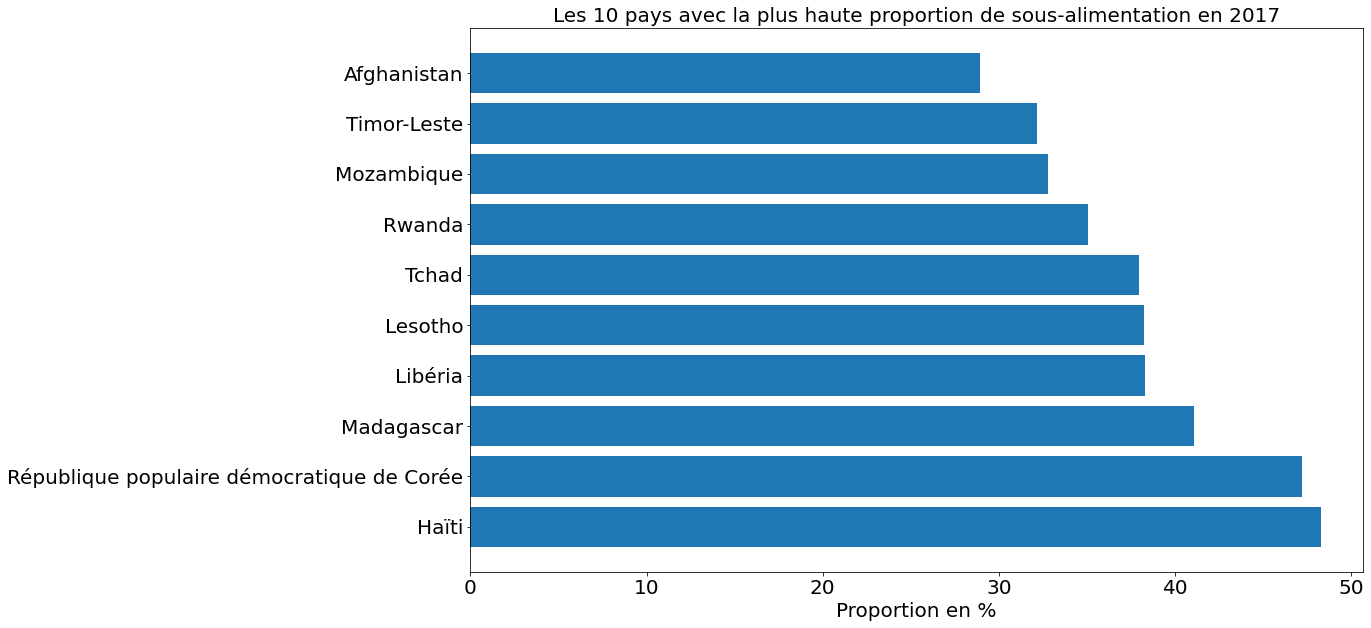

In [66]:
df_melanie1_plot = df_melanie1_sous_nutrition_sorted
plt.figure(figsize=(16, 10))
plt.barh(df_melanie1_plot['Zone'], df_melanie1_plot['Proportion'])
plt.title('Les 10 pays avec la plus haute proportion de sous-alimentation en 2017', fontsize=20)
plt.xlabel('Proportion en %', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
    
plt.show()

## Requête N°2 - <a class="anchor" id="section_2_2">les pays qui ont le plus bénéficié d’aide depuis 2013</a>

In [67]:
melanie2_aide_alimentaire = df_aide_alimentaire

In [68]:
# Regroupement par pays bénéficiaire en additionnant les valeurs
melanie2_aide_alimentaire = melanie2_aide_alimentaire.groupby('Pays bénéficiaire').sum()

In [69]:
# Création de la colonne proportion
melanie2_aide_alimentaire['Proportion'] = (
    melanie2_aide_alimentaire['Valeur'] / melanie2_aide_alimentaire['Valeur'].sum() * 100)

In [70]:
# Vérification de la colonne proportion
display(melanie2_aide_alimentaire.head())

,Année,Valeur,Proportion
Pays bénéficiaire,,,
Afghanistan,32216,185452,1.680443
Algérie,78561,81114,0.735001
Angola,8054,5014,0.045434
Bangladesh,50347,348188,3.155048
Bhoutan,24170,2666,0.024158


In [71]:
# Tri des données "Proportion" et affichage par ordre décroissant
melanie2_aide_alimentaire = melanie2_aide_alimentaire.sort_values(by='Proportion', ascending=False)

In [72]:
# Suppression de la colonne année (non-requise pour la demande)
del melanie2_aide_alimentaire['Année']

In [73]:
# Renommage des colonnes "Proportion" et "Valeur" pour plus de lisibilité
melanie2_aide_alimentaire = melanie2_aide_alimentaire.rename(
    columns={'Proportion' : 'Proportion (%)',
            'Valeur': 'Valeur (Tonnes)'})

In [74]:
melanie2_aide_alimentaire_sorted = melanie2_aide_alimentaire.head(10)

In [75]:
melanie2_aide_alimentaire_sorted.head(10)

,Valeur (Tonnes),Proportion (%)
Pays bénéficiaire,,
République arabe syrienne,1858943,16.844506
Éthiopie,1381294,12.516368
Yémen,1206484,10.932356
Soudan du Sud,695248,6.299875
Soudan,669784,6.069137
Kenya,552836,5.009432
Bangladesh,348188,3.155048
Somalie,292678,2.652054
République démocratique du Congo,288502,2.614213


In [76]:
# Création d'un np array pour stocker les données de proportion
np_melanie2_proportion = melanie2_aide_alimentaire_sorted['Proportion (%)'].to_numpy()

In [77]:
# Création d'un np array pour stocker les labels
np_melanie2_labels_pays = np.array(['République arabe syrienne', 'Ethiopie', 'Yémen',
                                   'Soudan du Sud', 'Soudan', 'Kenya', 'Bangladesh',
                                   'Somalie', 'République démocratique du Congo', 'Niger'])

In [78]:
# On arrondis les proportions à deux chiffres après la virgule pour une meilleure lisibilité
np_melanie2_proportion = np.around(np_melanie2_proportion, decimals=2)

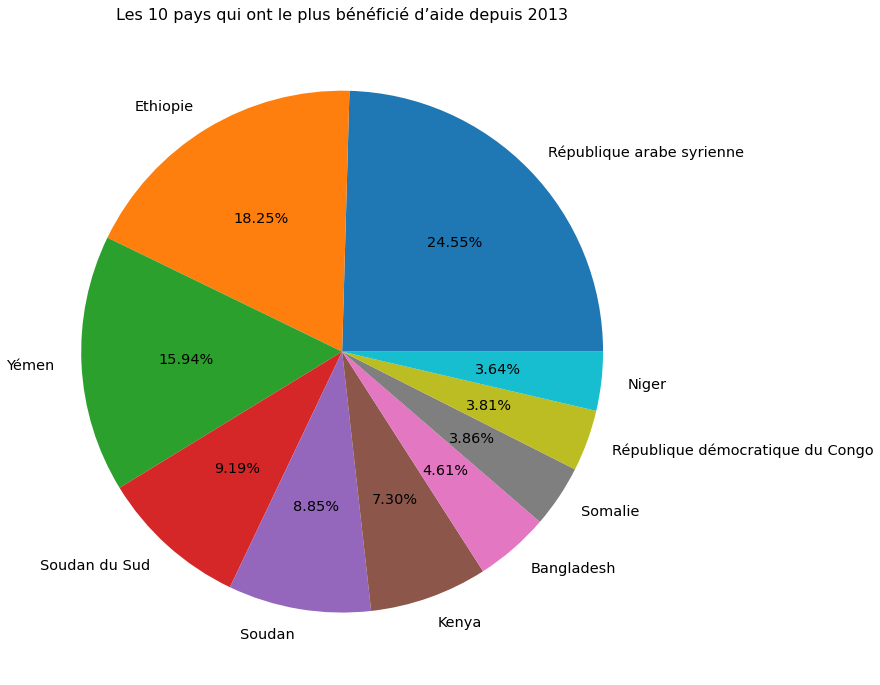

In [79]:
plt.figure(figsize=(16, 12))
plt.pie(np_melanie2_proportion, labels=np_melanie2_labels_pays, autopct='%.2f%%', textprops={'fontsize': 14.5})
plt.title('Les 10 pays qui ont le plus bénéficié d’aide depuis 2013', fontsize=16)
plt.show()

## Requête N°3 - <a class="anchor" id="section_2_3">les pays ayant le plus/le moins de disponibilité/habitant</a>

In [80]:
melanie3_dispo_alimentaire = df_dispo_alimentaire
melanie3_population = df_population

In [81]:
melanie3_dispo_alimentaire

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,NaN,NaN,45.0,4.70,4.28,1.41,3.0,NaN,0.0,3.0,NaN,2.0,NaN,NaN,NaN
15601,Îles Salomon,Viande de Volailles,animale,NaN,NaN,11.0,3.34,0.69,1.14,2.0,NaN,2.0,2.0,NaN,0.0,NaN,NaN,NaN
15602,Îles Salomon,"Viande, Autre",animale,NaN,NaN,0.0,0.06,NaN,0.04,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15603,Îles Salomon,Vin,vegetale,NaN,NaN,0.0,0.07,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [82]:
# Sélection des colonnes intéressantes pour la demande
melanie3_dispo_alimentaire = melanie3_dispo_alimentaire[['Zone', 'Disponibilité alimentaire (Kcal/personne/jour)']]

In [83]:
# Restriction sur l'année 2017
melanie3_population = melanie3_population.loc[melanie3_population['Année'] == 2017, :]

In [84]:
# Groupement des données en additionnant les dispos alimentaire par pays
melanie3_dispo_alimentaire = melanie3_dispo_alimentaire.groupby('Zone').sum()

In [85]:
display(melanie3_dispo_alimentaire.head())

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Afghanistan,2087.0
Afrique du Sud,3020.0
Albanie,3188.0
Algérie,3293.0
Allemagne,3503.0


In [86]:
# Mise à l'échelle de la valeur de la population des pays
melanie3_population['Valeur'] = melanie3_population['Valeur'] * 1000

C:\Users\Walid\AppData\Local\Temp\ipykernel_9368\3750179068.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melanie3_population['Valeur'] = melanie3_population['Valeur'] * 1000


In [87]:
# Jointure entre les deux dataframes avec la colonne Zone
melanie3_dispo_alimentaire = pd.merge(melanie3_population, melanie3_dispo_alimentaire, on='Zone')

In [88]:
display(melanie3_dispo_alimentaire.head(10))

,Zone,Année,Valeur,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2017,36296113.0,2087.0
1,Afrique du Sud,2017,57009756.0,3020.0
2,Albanie,2017,2884169.0,3188.0
3,Algérie,2017,41389189.0,3293.0
4,Allemagne,2017,82658409.0,3503.0
5,Angola,2017,29816766.0,2474.0
6,Antigua-et-Barbuda,2017,95426.0,2416.0
7,Arabie saoudite,2017,33101179.0,3255.0
8,Argentine,2017,43937140.0,3226.0
9,Arménie,2017,2944791.0,2924.0


In [89]:
# Création d'un dataframe pour stocker les pays avec le plus de disponibilité alimentaire
melanie3_dispo_alimentaire_plus = melanie3_dispo_alimentaire.sort_values(
    by=['Disponibilité alimentaire (Kcal/personne/jour)', 'Valeur'], ascending=False)

In [90]:
display(melanie3_dispo_alimentaire_plus.head(10))

,Zone,Année,Valeur,Disponibilité alimentaire (Kcal/personne/jour)
11,Autriche,2017,8819901.0,3770.0
17,Belgique,2017,11419748.0,3737.0
163,Turquie,2017,81116450.0,3708.0
54,États-Unis d'Amérique,2017,325084756.0,3682.0
80,Israël,2017,8243848.0,3610.0
78,Irlande,2017,4753279.0,3602.0
81,Italie,2017,60673701.0,3578.0
95,Luxembourg,2017,591910.0,3540.0
47,Égypte,2017,96442591.0,3518.0
4,Allemagne,2017,82658409.0,3503.0


In [91]:
# Création d'un dataframe pour stocker les pays avec le moins de disponibilité alimentaire
melanie3_dispo_alimentaire_moins = melanie3_dispo_alimentaire.sort_values(
    by=['Disponibilité alimentaire (Kcal/personne/jour)', 'Valeur'], ascending=True)

In [92]:
display(melanie3_dispo_alimentaire_moins.head(10))

,Zone,Année,Valeur,Disponibilité alimentaire (Kcal/personne/jour)
131,République centrafricaine,2017,4596023.0,1879.0
170,Zambie,2017,16853599.0,1924.0
97,Madagascar,2017,25570512.0,2056.0
0,Afghanistan,2017,36296113.0,2087.0
70,Haïti,2017,10982366.0,2089.0
136,République populaire démocratique de Corée,2017,25429825.0,2093.0
156,Tchad,2017,15016753.0,2109.0
171,Zimbabwe,2017,14236595.0,2113.0
120,Ouganda,2017,41166588.0,2126.0
158,Timor-Leste,2017,1243258.0,2129.0


In [93]:
# Création d'une copie du dataframe pour garder que les 10 premiers résultats
melanie3_dispo_alimentaire_plus10 = melanie3_dispo_alimentaire_plus.head(10)

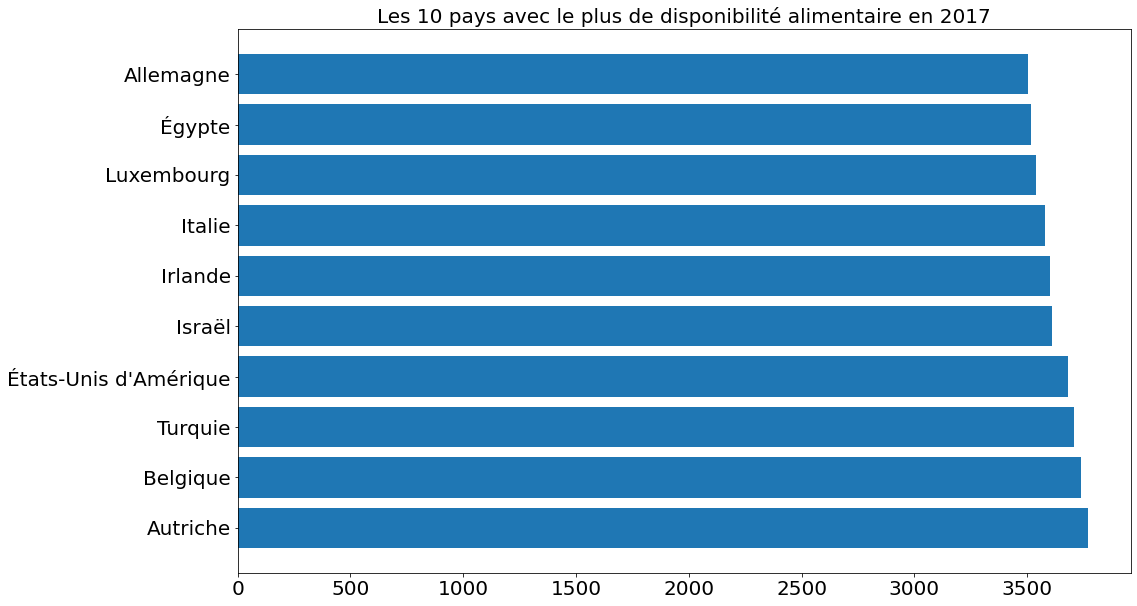

In [94]:
# Création du graphique pour les 10 pays avec le plus de disponibilité alimentaire
plt.figure(figsize=(16, 10))
plt.barh(
    melanie3_dispo_alimentaire_plus10['Zone'], 
    melanie3_dispo_alimentaire_plus10['Disponibilité alimentaire (Kcal/personne/jour)'])
plt.title('Les 10 pays avec le plus de disponibilité alimentaire en 2017', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [95]:
# Création d'une copie du dataframe pour garder que les 10 premiers résultats
melanie3_dispo_alimentaire_moins10 = melanie3_dispo_alimentaire_moins.head(10)

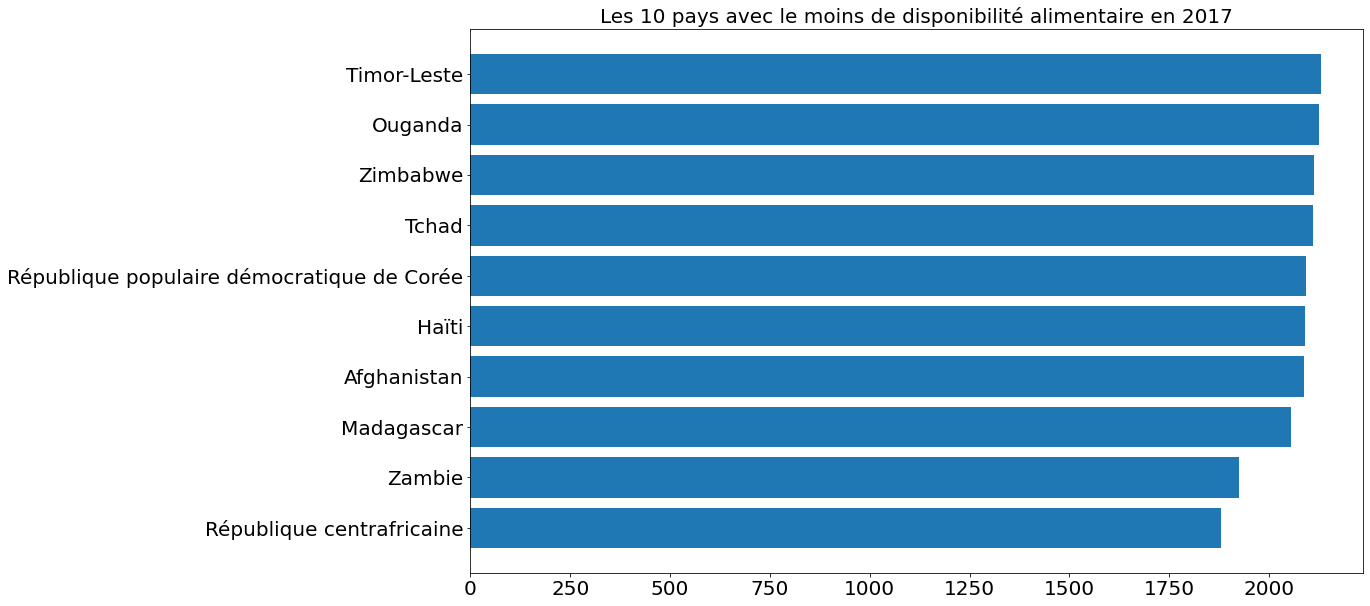

In [96]:
# Création du graphique pour les 10 pays avec le moins de disponibilité alimentaire
plt.figure(figsize=(16, 10))
plt.barh(
    melanie3_dispo_alimentaire_moins10['Zone'], 
    melanie3_dispo_alimentaire_moins10['Disponibilité alimentaire (Kcal/personne/jour)'])
plt.title('Les 10 pays avec le moins de disponibilité alimentaire en 2017', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

## Requête N°1 - <a class="anchor" id="section_3_1">les pistes supplémentaires de Julien concernant les céréales</a>

In [16]:
# Récupération des données concernant les céréales provenant du site de la FAO
df_cereales = pd.read_csv('cereales-2017.csv')

In [17]:
display(df_cereales.head())

,Domaine,Zone,Élément,Produit,Année,Valeur
0,Bilans Alimentaires (2010-),Afghanistan,Production,Blé et produits,2017,4281.0
1,Bilans Alimentaires (2010-),Afghanistan,Importations - Quantité,Blé et produits,2017,3080.0
2,Bilans Alimentaires (2010-),Afghanistan,Variation de stock,Blé et produits,2017,208.0
3,Bilans Alimentaires (2010-),Afghanistan,Exportations - Quantité,Blé et produits,2017,2.0
4,Bilans Alimentaires (2010-),Afghanistan,Disponibilité intérieure,Blé et produits,2017,7151.0


In [18]:
df_cereales.columns

Index(['Domaine', 'Zone', 'Élément', 'Produit', 'Année', 'Valeur'], dtype='object')

In [19]:
# Création d'un dataframe pour garder que les colonnes qui nous intéressentt
df_dispo_cereales = df_cereales[['Zone', 'Élément', 'Produit', 'Valeur']]

In [20]:
df_dispo_cereales

,Zone,Élément,Produit,Valeur
0,Afghanistan,Production,Blé et produits,4281.00
1,Afghanistan,Importations - Quantité,Blé et produits,3080.00
2,Afghanistan,Variation de stock,Blé et produits,208.00
3,Afghanistan,Exportations - Quantité,Blé et produits,2.00
4,Afghanistan,Disponibilité intérieure,Blé et produits,7151.00
...,...,...,...,...
19900,Zimbabwe,Nourriture,"Céréales, Autres",3.00
19901,Zimbabwe,Disponibilité alimentaire en quantité (kg/pers...,"Céréales, Autres",0.19
19902,Zimbabwe,Disponibilité alimentaire (Kcal/personne/jour),"Céréales, Autres",2.00
19903,Zimbabwe,Disponibilité de protéines en quantité (g/pers...,"Céréales, Autres",0.04


In [21]:
df_dispo_cereales = pd.pivot(df_dispo_cereales, index=['Zone', 'Produit'], columns=['Élément'], values=['Valeur'])

In [22]:
display(df_dispo_cereales.head())

Valeur  \
Élément                        Alimentation pour touristes   
Zone        Produit                                          
Afghanistan Avoine                                     NaN   
            Blé et produits                            NaN   
            Céréales, Autres                           NaN   
            Maïs et produits                           NaN   
            Millet et produits                         NaN   

                                                      \
Élément                        Aliments pour animaux   
Zone        Produit                                    
Afghanistan Avoine                               0.0   
            Blé et produits                    221.0   
            Céréales, Autres                     0.0   
            Maïs et produits                   111.0   
            Millet et produits                   0.0   

                                                                      \
Élément                        Autres utilisations (non alimentaire)   
Zone        Produit                                                    
Afghanistan Avoine                                               NaN   
            Blé et produits                                      NaN   
            Céréales, Autres                                     NaN   
            Maïs et produits                                     7.0   
            Millet et produits                                   NaN   

                                                                               \
Élément                        Disponibilité alimentaire (Kcal/personne/jour)   
Zone        Produit                                                             
Afghanistan Avoine                                                        0.0   
            Blé et produits                                            1404.0   
            Céréales, Autres                                              0.0   
            Maïs et produits                                              9.0   
            Millet et produits                                            1.0   

                                                                                       \
Élément                        Disponibilité alimentaire en quantité (kg/personne/an)   
Zone        Produit                                                                     
Afghanistan Avoine                                                           0.00       
            Blé et produits                                                163.76       
            Céréales, Autres                                                 0.00       
            Maïs et produits                                                 1.06       
            Millet et produits                                               0.16       

                                                                                              \
Élément                        Disponibilité de matière grasse en quantité (g/personne/jour)   
Zone        Produit                                                                            
Afghanistan Avoine                                                           0.00              
            Blé et produits                                                  5.08              
            Céréales, Autres                                                 0.00              
            Maïs et produits                                                 0.13              
            Millet et produits                                               0.01              

                                                                                         \
Élément                        Disponibilité de protéines en quantité (g/personne/jour)   
Zone        Produit                                                                       
Afghanistan Avoine                                                           0.00         
            Blé et produits       

In [23]:
# Calcul de la proportion de céréales pour la population humaine
dispo_cereales_population = df_dispo_cereales[
    ('Valeur', 'Nourriture')].sum() / df_dispo_cereales[('Valeur', 'Disponibilité intérieure')].sum() * 100

# AFfichage de la proportion de céréales pour la population humaine
print("La proportion de céréales pour la population humaine est de {:,.2f} %".format(dispo_cereales_population))

La proportion de céréales pour la population humaine est de 46.28 %


In [24]:
# Calcul de la proportion de céréales pour les animaux
dispo_cereales_animaux = df_dispo_cereales[
    ('Valeur', 'Aliments pour animaux')].sum() / df_dispo_cereales[('Valeur', 'Disponibilité intérieure')].sum() * 100

# AFfichage de la proportion de céréales pour les animaux
print("La proportion de céréales pour les animaux est de {:,.2f} %".format(dispo_cereales_animaux))

La proportion de céréales pour les animaux est de 33.39 %


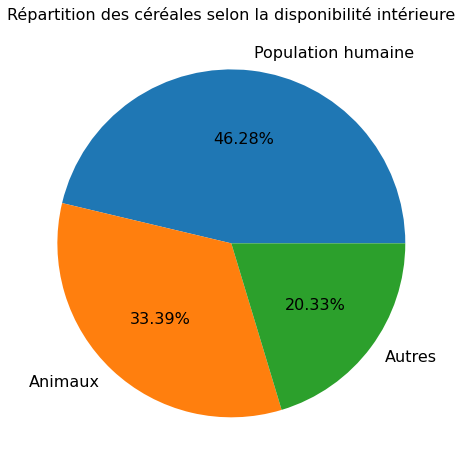

In [25]:
# Création du graphique pour les proportions récupérées

# Stockage des chiffres dans un tableau (20,33 correspond à ce qui n'est pas des céréales)
dispo_cereales_chiffres = [46.28, 33.39, 20.33]

# Création des labels
dispo_cereales_labels = ['Population humaine', 'Animaux', 'Autres']

# Création du graphique
plt.figure(figsize=(12, 8))
plt.pie(dispo_cereales_chiffres, labels=dispo_cereales_labels, autopct='%.2f%%', textprops={'fontsize': 16})
plt.title('Répartition des céréales selon la disponibilité intérieure', fontsize=16)
plt.show()

## Requête N°2 - <a class="anchor" id="section_3_2">la Thaïlande et l'utilisation du manioc</a>

In [107]:
manioc = df_dispo_alimentaire

In [108]:
# Création d'une dataframe pour garder que la Thaïlande et le manioc en produit
df_manioc = manioc.loc[(manioc['Zone'] == "Thaïlande") & (manioc['Produit'] == 'Manioc'), :]

In [109]:
# Vérification de la dataframe
display(df_manioc.head())

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,25214.0,1250.0,871.0,1511.0,30228.0,NaN,0.0,0.0


In [110]:
# Calcul de la proportion de manioc pour la population humaine
manioc_dispo_population = df_manioc["Nourriture"] / df_manioc["Disponibilité intérieure"] * 100

# Affichage de la proportion de manioc pour la population humaine
display(manioc_dispo_population)

13809    13.904853
dtype: float64

In [111]:
# Calcul de la proportion de manioc pour les animaux
manioc_dispo_animaux = df_manioc["Aliments pour animaux"] / df_manioc["Disponibilité intérieure"] * 100

# Affichage de la proportion de manioc pour les animaux
display(manioc_dispo_animaux)

13809    28.735632
dtype: float64

In [112]:
# Calcul de la proportion de manioc pour l'exportation
manioc_dispo_exportation = df_manioc['Exportations - Quantité'] / (
    df_manioc['Production'] + df_manioc['Importations - Quantité'] + df_manioc['Variation de stock']) * 100

# Affichage de la proportion de manioc pour l'exportation
display(manioc_dispo_exportation)

13809    80.100388
dtype: float64

In [113]:
# Initiation d'une variable pour récupérer la population Thaïlandaise par la suite
thailande_population = df_population

In [114]:
# Récupération de la population Thäilandaise
thailande_population = thailande_population.loc[
    (thailande_population['Zone'] == 'Thaïlande') & (thailande_population['Année'] == 2017), :]

In [115]:
# Vérification de la récupération ci-dessus
display(thailande_population.head())

,Zone,Année,Valeur
1312,Thaïlande,2017,69209.81


In [116]:
# Initialiation d'une variable pour récupérer la population Thaïlandaise en sous-nutrition par la suite
thailande_sous_nutrition = df_sous_nutrition

In [117]:
# Jointure par la gauche entre la population Thäilandaise et la population en sous-nutrition Thaïlandaise
thailande_population = pd.merge(thailande_population, thailande_sous_nutrition, on="Zone", how="left")

In [118]:
# Vérification de la jointure
display(thailande_population.head())

,Zone,Année_x,Valeur_x,Année_y,Valeur_y
0,Thaïlande,2017,69209.81,2012-2014,6.2
1,Thaïlande,2017,69209.81,2013-2015,6.0
2,Thaïlande,2017,69209.81,2014-2016,5.9
3,Thaïlande,2017,69209.81,2015-2017,6.0
4,Thaïlande,2017,69209.81,2016-2018,6.2


In [119]:
# Restriction sur la colonne "Année_y"
thailande_population = thailande_population.loc[thailande_population['Année_y'] == '2016-2018', :]

In [120]:
# Vérification de la restriction sur l'année
display(thailande_population.head())

,Zone,Année_x,Valeur_x,Année_y,Valeur_y
4,Thaïlande,2017,69209.81,2016-2018,6.2


In [121]:
# Changement du type de la colonne "Valeur_y" pour la passer en float64 (object de base)
thailande_population['Valeur_y'] = thailande_population['Valeur_y'].apply('float')

In [122]:
# Renommage des colonnes pour plus de lisibilité
thailande_population.rename(columns = {
    'Valeur_x' : 'Population sous-nutrition (millions)',
    'Valeur_y' : 'Population (millions)'},
                            inplace=True)

In [123]:
# Mise à l'échelle des colonnes
thailande_population['Population sous-nutrition (millions)'] = (
    thailande_population['Population sous-nutrition (millions)'].sum() * 1000)
thailande_population['Population (millions)'] = thailande_population['Population (millions)'].sum() * 1000000

In [124]:
display(thailande_population.head())

,Zone,Année_x,Population sous-nutrition (millions),Année_y,Population (millions)
4,Thaïlande,2017,69209810.0,2016-2018,6200000.0


In [125]:
# Suppression de la colonne "Année y"
del thailande_population['Année_y']

In [126]:
# Calcul de la population Thaïlandaise en sous-nutrition
thailande_proportion_population = (
    thailande_population['Population sous-nutrition (millions)'].sum() / thailande_population['Population (millions)']) 

# Affichage de la proportion en sous-nutrition
print(thailande_proportion_population)

4    11.162873
Name: Population (millions), dtype: float64


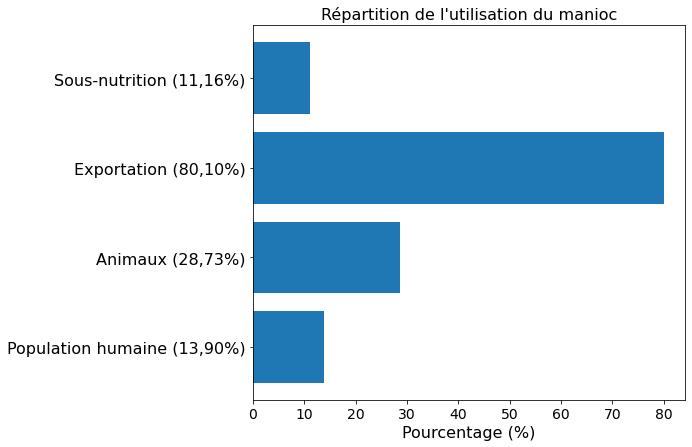

In [127]:
# Création du graphique sur l'utilisation du manioc

fig = plt.figure()
axes = fig.add_axes([0.7, 0.6, 1, 1.3])
population_x = ['Population humaine (13,90%)', 'Animaux (28,73%)', 'Exportation (80,10%)', 'Sous-nutrition (11,16%)']
chiffres_y = [13.90, 28.73, 80.10, 11.16]
plt.barh(population_x, chiffres_y)
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.xlabel("Pourcentage (%)", fontsize=16)
plt.title("Répartition de l'utilisation du manioc", fontsize=16)

plt.show()